In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [113]:
names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
data = pd.read_csv("/home/jayadev/Downloads/iris.data", names = names)
data = data.sample(frac = 1).reset_index(drop = True)    # shuffle the data
X = np.array(data.iloc[:, :2])
y = data.iloc[:, 4]
[m, n] = X.shape
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,class
0,6.4,2.8,5.6,2.1,Iris-virginica
1,5.0,2.3,3.3,1.0,Iris-versicolor
2,6.7,3.0,5.0,1.7,Iris-versicolor
3,6.9,3.1,5.4,2.1,Iris-virginica
4,5.5,2.6,4.4,1.2,Iris-versicolor


In [114]:
def Initialize(X, K):
    perm = np.arange(X.shape[0])
    np.random.shuffle(perm)
    data_reorder = X[perm]
    return data_reorder[:K]

In [115]:
def closestCentroid(X, centroids):
    m = X.shape[0]
    K = centroids.shape[0]
    idx = np.zeros([m, 1])
    sicdIndividual = np.zeros(m)
    sicd = []
    for i in range(m):
        error_sum = np.sum((X[i] - centroids) ** 2, 1)
        sicdIndividual[i] = np.min(error_sum)
        idx[i] = np.argmin(error_sum)
    for i in range(K):
        sicd.append(sicdIndividual[(i == idx).flatten()].sum())
    return [idx, sicd]
def compute(X, idx, K):
    [m, n] = X.shape
    centroids = np.zeros([K, n])
    for i in range(K):
        points = X[(i == idx).flatten()]
        if (len(points) < 1): 
            centroids = np.zeros([1, n])
            continue
        centroids[i] = np.array([points.mean(axis = 0)])

    return centroids

In [116]:
def kMeans(X, K):
    centroids = Initialize(X, K)
    [m, n] = X.shape
    sicd = np.zeros(m)
    i = 0
    while True:
        [idx, sicdCurrent] = closestCentroid(X, centroids)
        sicd = sicdCurrent
        newCentroids = compute(X, idx, K)
        i += 1
        if (np.array_equal(newCentroids, centroids)):
            break
        centroids = newCentroids
    centroids = newCentroids
    
    clusters = []
    for k in range(K):
        clusters.append(X[(k == idx).flatten()])
    
    return { 
            "centroids": centroids, 
            "sicd": sicd, 
            "iterations": i,
            "clusters": clusters,
            "idx": idx
        }

In [117]:
def bisectingKMeans(X, K):
    clusters = [X]
    sicd = [0]               
    centroids = [[]]
    idx = [[]]
    while (len(clusters) < K):
        sicdMaxPosition = sicd.index(max(sicd))
        result = kMeans(clusters[sicdMaxPosition], 2)
        clusters[sicdMaxPosition] = result["clusters"][1]
        clusters.insert(sicdMaxPosition, result["clusters"][0])
        centroids[sicdMaxPosition] = result["centroids"][1]
        centroids.insert(sicdMaxPosition, result["centroids"][0])
        sicd[sicdMaxPosition] = result["sicd"][1]
        sicd.insert(sicdMaxPosition, result["sicd"][0])
        
    return { "centroids": np.array(centroids), "sicd": sicd, "clusters": clusters }

In [118]:
K = 3
results = bisectingKMeans(X, K)
clusters = results["clusters"]
centroids = results["centroids"]
sicd = results["sicd"]

print("Centroids: ")
for i in range(K):
        print(
              ( centroids[i][0], centroids[i][1]))

print("\nClusters are: ")
for cluster in list(map(lambda a : a.tolist()[:X.shape[0]], clusters)):
    print("\nCluster: ")
    print(cluster, end = " ")

Centroids: 
(5.412000000000001, 2.6159999999999997)
(5.016326530612246, 3.440816326530612)
(6.518421052631579, 2.9486842105263156)

Clusters are: 

Cluster: 
[[5.0, 2.3], [5.5, 2.6], [5.5, 2.5], [5.6, 2.9], [5.5, 2.4], [5.6, 3.0], [5.6, 3.0], [5.7, 2.5], [4.9, 2.5], [4.9, 2.4], [5.6, 2.8], [5.6, 2.7], [5.5, 2.3], [5.6, 2.5], [5.7, 3.0], [5.7, 2.6], [5.7, 2.9], [5.4, 3.0], [5.7, 2.8], [5.5, 2.4], [5.0, 2.0], [5.2, 2.7], [5.7, 2.8], [4.5, 2.3], [5.1, 2.5]] 
Cluster: 
[[5.0, 3.5], [5.7, 3.8], [5.0, 3.4], [5.0, 3.0], [5.0, 3.4], [4.4, 2.9], [4.6, 3.4], [5.1, 3.7], [4.9, 3.1], [5.7, 4.4], [5.2, 4.1], [4.9, 3.0], [5.0, 3.3], [4.9, 3.1], [5.1, 3.8], [5.4, 3.4], [5.0, 3.6], [4.4, 3.2], [5.5, 3.5], [4.6, 3.6], [5.4, 3.9], [5.2, 3.5], [4.6, 3.1], [5.1, 3.5], [4.4, 3.0], [5.3, 3.7], [5.2, 3.4], [5.1, 3.8], [4.8, 3.0], [4.7, 3.2], [4.6, 3.2], [5.1, 3.5], [5.1, 3.3], [5.1, 3.8], [4.8, 3.1], [5.4, 3.7], [5.4, 3.4], [5.8, 4.0], [4.8, 3.0], [4.3, 3.0], [4.8, 3.4], [5.0, 3.5], [4.8, 3.4], [4.7, 3.2], [

In [100]:
prevSicd = sum(sicd)
print("Sum of squared error is %f" % prevSicd)

Sum of squared error is 84.224507


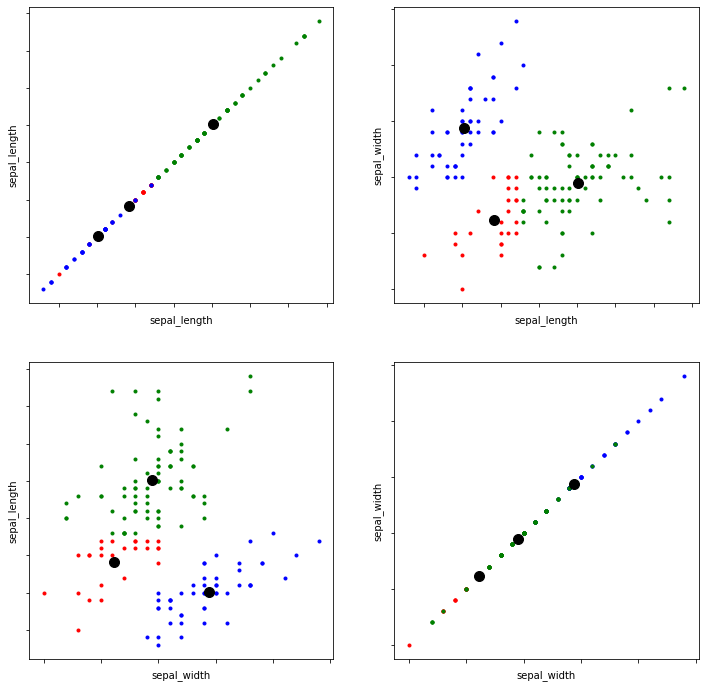

In [119]:
colors = [ "red", "blue", "green" ]
_, plots = plt.subplots(n, n, figsize = (12, 12))

for i in range(n):    
    for j in range(n):
        plots[i, j].set_xlabel(names[i])
        plots[i, j].set_ylabel(names[j])
        plots[i, j].set_xticklabels([])
        plots[i, j].set_yticklabels([])
        for k in range(K):
            selection = clusters[k]
            plots[i, j].scatter(selection[:, i], selection[:, j], color = colors[k], marker = ".")
        plots[i, j].scatter(centroids[:, i], centroids[:, j], color = "black", marker = "o", s = 100)

In [102]:
K = 3
iterations = 500
sicd = []
for i in range(iterations):
    newResults = bisectingKMeans(X, K)
        
    if (len(sicd) == 0 or sicd[len(sicd) - 1] > sum(newResults["sicd"])):
        sicd.append(sum(newResults["sicd"]))
        results = newResults
    else:
        sicd.append(sicd[len(sicd) - 1])

In [109]:
clusters = results["clusters"]
centroids = results["centroids"]

print("Centroids: ")
for i in range(K):
        print(
              (centroids[i][0], centroids[i][1]))
        
print("\nSum of squared error is %f" % (sicd[iterations - 1]))


for cluster in list(map(lambda a : a.tolist()[:X.shape[0]], clusters)):
    print("\n\n\n\nCluster: ")
    print(cluster, end = " ")

Centroids: 
(5.00566037735849, 3.3603773584905676)
(6.849999999999997, 3.073684210526315)
(5.947457627118646, 2.7661016949152546)

Sum of squared error is 84.224507




Cluster: 
[[4.8, 3.0, 1.4, 0.3], [5.4, 3.7, 1.5, 0.2], [4.8, 3.4, 1.6, 0.2], [5.3, 3.7, 1.5, 0.2], [4.9, 3.1, 1.5, 0.1], [5.1, 3.5, 1.4, 0.3], [5.2, 3.5, 1.5, 0.2], [4.8, 3.4, 1.9, 0.2], [5.0, 3.3, 1.4, 0.2], [5.1, 2.5, 3.0, 1.1], [5.2, 4.1, 1.5, 0.1], [5.1, 3.8, 1.9, 0.4], [4.9, 3.1, 1.5, 0.1], [5.1, 3.7, 1.5, 0.4], [4.6, 3.4, 1.4, 0.3], [5.8, 4.0, 1.2, 0.2], [5.0, 3.5, 1.6, 0.6], [5.0, 3.2, 1.2, 0.2], [4.4, 3.2, 1.3, 0.2], [4.9, 3.0, 1.4, 0.2], [5.0, 3.4, 1.5, 0.2], [5.5, 3.5, 1.3, 0.2], [5.7, 4.4, 1.5, 0.4], [5.4, 3.4, 1.5, 0.4], [5.0, 3.5, 1.3, 0.3], [4.3, 3.0, 1.1, 0.1], [5.0, 3.0, 1.6, 0.2], [5.1, 3.8, 1.6, 0.2], [5.4, 3.9, 1.7, 0.4], [5.4, 3.9, 1.3, 0.4], [5.5, 4.2, 1.4, 0.2], [5.1, 3.5, 1.4, 0.2], [5.1, 3.4, 1.5, 0.2], [4.6, 3.1, 1.5, 0.2], [4.6, 3.6, 1.0, 0.2], [4.7, 3.2, 1.3, 0.2], [4.7, 3.2, 1.6, 0.2], [4.4, 

In [104]:
K = 3
iterations = 500
sicdKMeans = []
for i in range(iterations):
    newKMeans = kMeans(X, K)
    
    if (len(sicdKMeans) == 0 or sicdKMeans[len(sicdKMeans) - 1] > sum(newKMeans["sicd"])):
        sicdKMeans.append(sum(newKMeans["sicd"]))
        kMeansResult = newKMeans
    else:
        sicdKMeans.append(sicdKMeans[len(sicdKMeans) - 1])

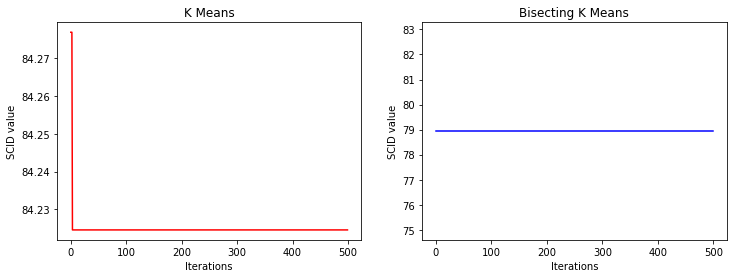

SICD values are:
    K Means          : 78.9408 
    Bisecting K Means: 84.2245


In [64]:
_, plots = plt.subplots(1, 2, figsize = (12, 4))
plots[1].set_title("Bisecting K Means")
plots[0].set_title("K Means")
plots[0].set_xlabel("Iterations")
plots[0].set_ylabel("SCID value")
plots[1].set_xlabel("Iterations")
plots[1].set_ylabel("SCID value")
plots[0].plot(np.arange(iterations), sicd, color = "red")
plots[1].plot(np.arange(iterations), sicdKMeans, color = "blue")
plt.show()

print("""SICD values are:
    K Means          : %.4f 
    Bisecting K Means: %.4f""" % (sicdKMeans[-1], sicd[-1]))